# Machine Learning Homework 5 
## Deep learning and ensemble methods 


#### General instructions

Please look up the general instructions about homeworks from the first homework.

#### Tracking your time

We will appreciate if you track your time spent on solving the homework and report it in the dedicated cells at the end of the homework. This is not compulsory and does not affect your grade in any way. The collected information will be used to improve future homeworks.

## Task 1: Deep learning (3 points)

The goal of this task is to get to know the possibilities in Python for training neural networks. We will try out a popular deep learning framework: [Keras](https://keras.io/). Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. Keras has very well designed API, which allows for concise code and flexibility at the same time.

We will do this based on an image dataset [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). The CIFAR-10 dataset consists of 60 000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. Our goal is to train a neural network to classify these images.

The following instructions help to install required dependencies and load the data.

### Installation

#### Linux

To install Keras enter following on Conda command-line:
```
conda install keras
```

By default Keras uses Tensorflow backend. If you happen to have recent NVidia GPU on your machine, you might want to install GPU version of Tensorflow:
```
conda install tensorflow-gpu
```
When you import Keras in your code, you should see "Using TensorFlow backend." notice.

PS. If you have non-NVidia GPU, you might want to give a shot to [PlaidML](http://vertex.ai/blog/announcing-plaidml) Keras backend.

#### Windows

To install Keras enter following on Conda command-line:
```
pip install keras
```
By default Keras uses Tensorflow backend. If you happen to have recent NVidia GPU on your machine, you might want to install GPU version of Tensorflow:
```
pip install tensorflow-gpu
```
When you import Keras in your code, you should see "Using TensorFlow backend." notice.

In [0]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install keras
#!pip uninstall -y tf-nightly tensorflow
#!pip install tf-nightly-2.0-preview --quiet
#!pip install "tensorflow-hub>=0.3"
CRED = '\033[91m'
CEND = '\033[0m'

Using TensorFlow backend.


In [0]:
# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


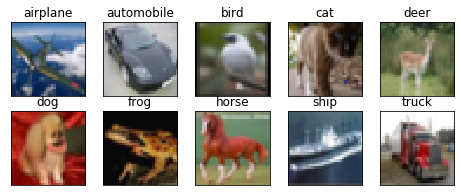

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

Building an effective neural network model requires careful consideration of the network architecture as well as the input data format.

First, let's get to know our data.

- **(a)** What do the 4 dimensions ((50000, 32, 32, 3)) of X_train represent? What values do these data contain and from what range do these values come from?

**<font color='purple'>Answer to (a):</font>**
Following are the features that shows by 4-dimensions.
1. 50000 represents the size of images training dataset.
2. 32 x 32 shows the image size (height x width)
3. 3 represent the colours channel.

- **(b)** The following code normalizes the training and testing data. Explain shortly why is data normalization important for training neural networks.

In [0]:
mu = X_train.mean(axis=(0,1,2))
std = X_train.std(axis=(0,1,2))
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

**<font color='purple'>Answer to (b):</font>**
Pixel values are intergers values with between 0-255.The neural network needs process inputs using small weight values,and input values with large integer values can disrupt or slow down the learning process.As such it is good to normalize the pixel values,so that pixel value has a value between 0 and 1.


Now we are ready to define our model. We will be using a Convolutional Neural Network (CNN) for this purpose. First we need to define the sequence of dependencies, the computational graph.

We define the following arcitecture:

1. 3x3 convolution with 32 filters, stride 1, padding same
2. batch normalization
3. relu
4. 3x3 convolution with 32 filters, stride 1, padding valid
5. batch normalization
6. relu
7. max pooling 2x2
8. dropout 0.25
7. flatten
8. dense 100
5. batch normalization
6. relu
8. dropout 0.5
8. dense 10
9. softmax

You can consult Keras documentation for layer parameters:
 - [Convolutional layers](https://keras.io/layers/convolutional/)
 - [Pooling layers](https://keras.io/layers/pooling/)
 - [Normalization layers](https://keras.io/layers/normalization/)

In [0]:
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout

x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
b1 = BatchNormalization()(c1)
a1 = Activation('relu')(b1)
c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="valid")(a1)
b2 = BatchNormalization()(c2)
a2 = Activation('relu')(b2)
p2 = MaxPooling2D(pool_size=2)(a2)
d2 = Dropout(rate=0.25)(p2)
f2 = Flatten()(d2)
h3 = Dense(100)(f2)
b3 = BatchNormalization()(h3)
a3 = Activation('relu')(b3)
d3 = Dropout(rate=0.5)(a3)
z = Dense(10)(d3)
p = Activation('softmax')(z)

- **(c)** Describe shortly what are Conv2D, BatchNormalization, Dropout and Dense? 

**<font color='purple'>Answer to (c):</font>**

x = Input(shape=(32, 32, 3))
c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)

**Convo2D**: This method creates a convolutional layer.The first parameter is the filter method and the second one is the filter size.32 is a filter with size 3 X 3.
	       Strides is 1 for convolutional layers by default.At last,we did use the padding method to overcome the reduction of the size,usually there are two method of padding same or valid.We have applied the "same" method.

**Batch Normalization**:- It is a technique for improving the speed,performance and stability of artifical neural networks.

**Dropout**:- It can be consider as regularization method.It can be used to prevent an overfitting.Using dropout,a neuron is temporarily "dropped" or disabled with probability.And dropped-out neurons are resampled with probability p at every trianing step.so a dropped out neuron at one step can be active at the next one.

**Dense**:- This is a basic concept that it feeds all the outputs from the previous layers to all its layers,each neuron providing one output to the next layer.


Conv2D:

BatchNormalization:

Dropout:

Dense:

- **(d)** Why do we set parameter 10 in the last fully connected layer?

**<font color='purple'>Answer to (d):</font>**
The reason is that above we have defined 10 classes labels for our datasets and these classes are then identified by softmax function which will give 10 different outputs using it.



Now that we have defined the arhitecture, we can create a model simply by saying what is the input and what is output. Cross-entropy loss is applied to the network with Adam optimizer and additional accuracy metric. sparse_categorical_crossentropy loss allows us to pass integer class values directly as targets and is potentially more efficient than categorical_crossentropy, which needs one-hot vectors as targets.

`model.summary()` prints out layer list with output shapes and is very useful for debugging the model. 

In [0]:
from keras.models import Model
from keras.optimizers import Adam

model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 32)        0   

- **(e)** How many layers does our network have and how many parameters are we going to train?

**<font color='purple'>Answer to (e):</font>**
The Network containing params are 731,910 with training params 731,582 and non-training params are 328.The layers are 6 in this newtwork.


Now we train our first model in Keras. Keras follows style similar to Scikit-learn, where a model has methods `fit()`, `predict()` and `evaluate()`. We use `validation_split` parameter to automatically produce validation set that is 4% of the whole dataset.
**Note:** This can take a while

In [0]:
# Fit the model; returns History object
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=5, validation_split=0.04)

Train on 24000 samples, validate on 1000 samples
Epoch 1/5
24000/24000 [==============================] - 5s 204us/step - loss: 1.5981 - acc: 0.4365 - val_loss: 1.1897 - val_acc: 0.5770
Epoch 2/5
24000/24000 [==============================] - 3s 140us/step - loss: 1.2163 - acc: 0.5687 - val_loss: 1.0739 - val_acc: 0.6270
Epoch 3/5
24000/24000 [==============================] - 3s 137us/step - loss: 1.0904 - acc: 0.6187 - val_loss: 1.0328 - val_acc: 0.6510
Epoch 4/5
24000/24000 [==============================] - 3s 139us/step - loss: 1.0064 - acc: 0.6449 - val_loss: 1.0304 - val_acc: 0.6360
Epoch 5/5
24000/24000 [==============================] - 3s 137us/step - loss: 0.9328 - acc: 0.6722 - val_loss: 0.9852 - val_acc: 0.6700


- **(f)** Please explain the concepts of **batch** and **epoch**.

**<font color='purple'>Answer to (f):</font>**

The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model's internal parameter's are basically updated.
     The number of epochs is a hyper-parameter of gradient descent that controls the number of iteration passes through the training dataset.


The following graphs illustrate the behaviour of Loss and Accuracy during the training process.

Text(0.5, 1.0, 'Accuracy')

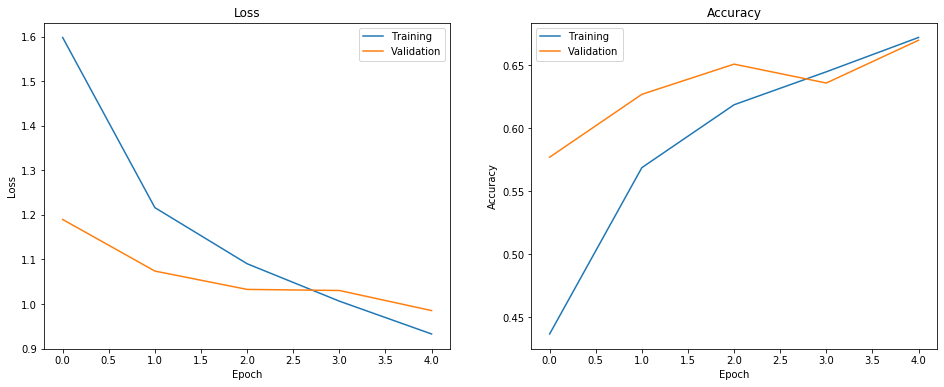

In [0]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')

- **(g)** Explain what do you see in these figures. Does it makes sense?

**<font color='purple'>Answer to (g):</font>**
If we look into a Loss figure,We can clearly see that at starting of an epochs,the loss is directly decreasing as epochs increasing but validation loss somehow not directly decreasing at starting epochs.
      The accuracy figure showing that training is rapidly increasing as number of epochs increasing but somehow validation accuracy is not rapidly increasing it is improving after skipping one iteration than training.


Next we will evaluate our trained network on the test and training data.

In [0]:
# IPython notebook just prints out the returned values - loss and accuracy
model.evaluate(X_test_norm, y_test)

10000/10000 [==============================] - 1s 92us/step


[0.9901648813247681, 0.6488]

In [0]:
# the same for training set
model.evaluate(X_train_norm, y_train)

25000/25000 [==============================] - 2s 91us/step


[0.6922644071578979, 0.76316]

- **(h)** Based on the training and test accuracy, is the trained network good?

**<font color='purple'>Answer to (h):</font>**
Yes,the training accuracy giving 0.94 and testing set giving the 0.65 which is probably not a good network.

- **(i)** Which class is predicted for the first image in this test set? Is it correctly classified? 

**<font color='purple'>Answer to (i):</font>**
Most Likely class is cat

In [0]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
   # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    classes = ['cat', 'airline', 'bird', 'automobile', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    predicted_class_first_image = model.predict(X_test_norm)
    index=np.argsort(predicted_class_first_image[0,:])
    print("Most likely class:", classes[index[9]], "-- Probability:", predicted_class_first_image[0,index[9]])
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Most likely class: automobile -- Probability: 0.7568591


### Finding similar images

The simplest way to measure the similarity between images would be to use euclidean distance. 

- **(j)** Calculate the euclidean distance between all test images. Show 10 closest images for 10 randomly selected image by filling the caps in the code below. What do you observe?

In [0]:
# we have to flatten the images to calculate the distances
X_test_flat = np.reshape(X_test, (X_test.shape[0], -1))
X_test_flat.shape

(10000, 3072)

In [0]:
import numpy as np
paramk = 1 # parameter k of k-nearest neighbors
numTrainImages = np.shape(y_train)[0] # so many train images      #training images trLabels
numTestImages = np.shape(y_test)[0] # so many test images         #testing  images tLabels

In [0]:
import random
random.randint(1,101)
mylist = range(10000)
random_ind = random.sample(mylist,10)
print(random_ind)

[7790, 1547, 925, 7913, 8373, 2071, 7509, 7622, 1003, 3907]


In [0]:
random_imges=X_test_flat[random_ind]   #removed[x]
print(random_imges.shape)

(10, 3072)


In [0]:
from sklearn.metrics.pairwise import euclidean_distances
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    dists=[]
    for each_img in random_imges:
        each_li=[]
        for test_img in X_test_flat:
            each_li.append(euclidean_distances(test_img.reshape(1,3072),each_img.reshape(1,3072))[0][0])
        dists.append(each_li)
    # each_result=[]
    # for each_li in all_li:
    #     each_result.append(np.argsort(each_li)[-10:])

    # for each_one in each_result:
    #     pic=np.reshape(each_one,(32,32))
    #     plt
    # dists = ...
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

In [0]:
each_li[2]
#each_result[2]

4996.267106550649

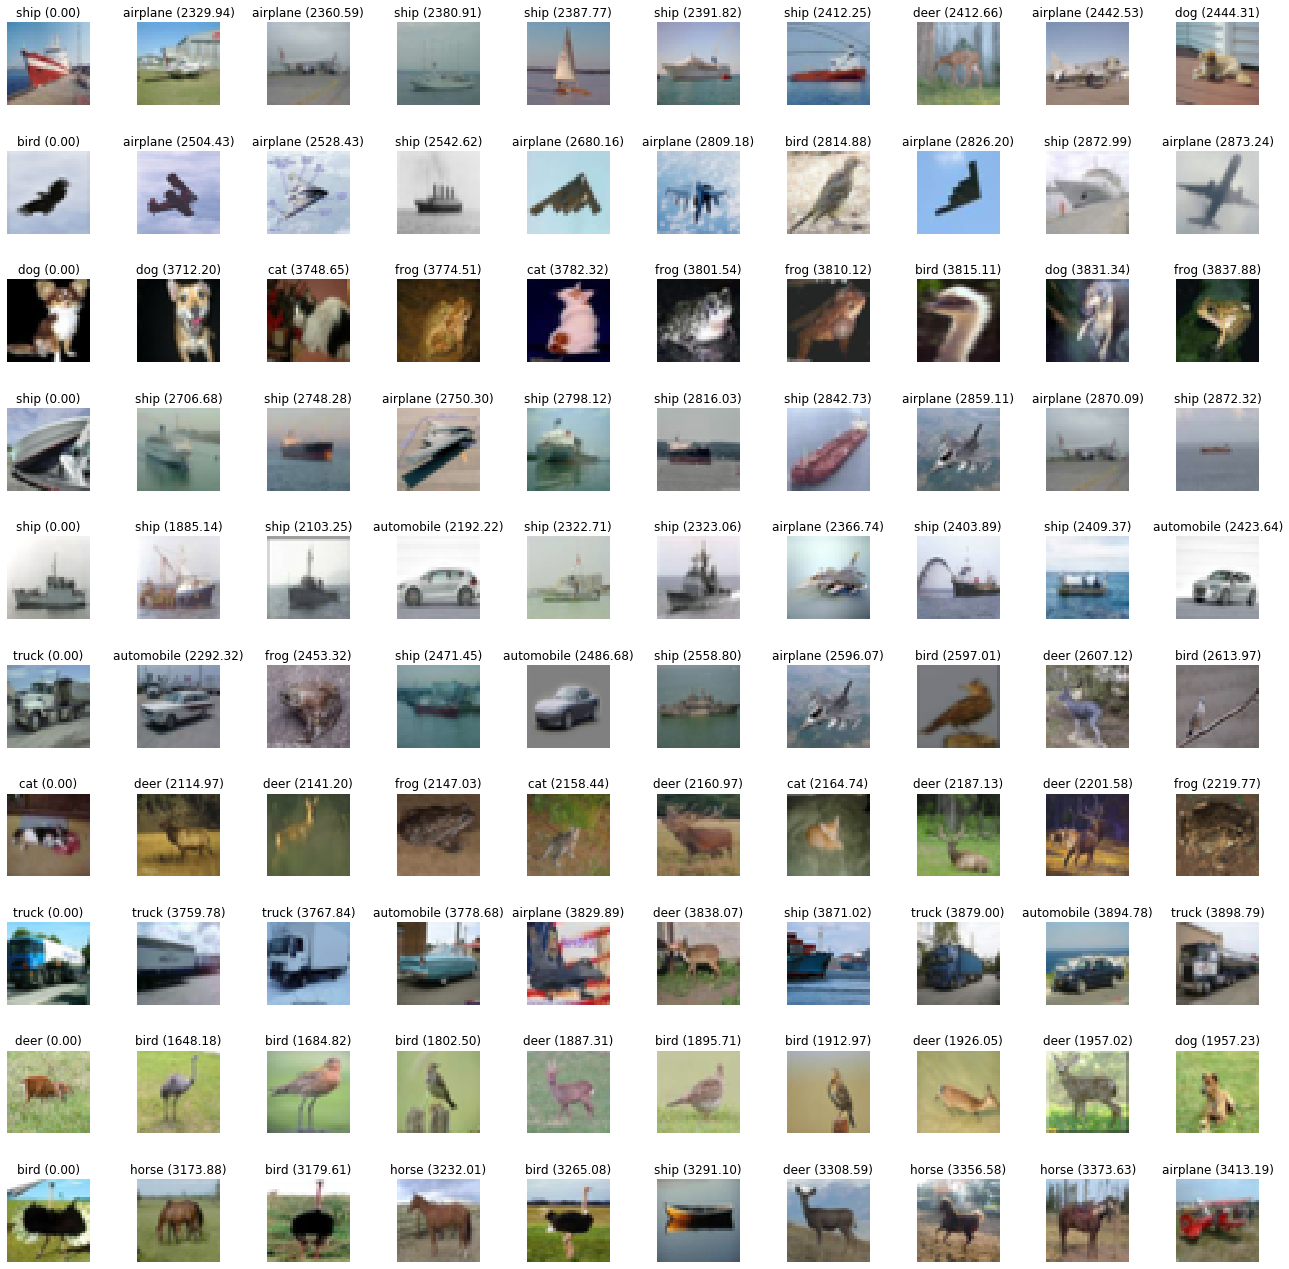

In [0]:
plt.figure(figsize=(18,18))
for i in range(10):
    closest = np.argsort(dists[i])[:10]
    for k, j in enumerate(closest):
        plt.subplot(10, 10, i*10 + k + 1)
        plt.imshow(X_test[j])
        c = class_names[y_test[j][0]]
        plt.axis('off')
        plt.title("%s (%0.2f)" % (c,dists[i][j]))
plt.tight_layout()

**<font color='purple'>Answer to (j):</font>** The results are not accurate. There are many missclassification in classes. 

**Feature extraction:** Model trained for classification can be used in other creative ways, for example finding similar images. The hidden layer activations can be thought of as features extracted from the images. As the final goal is to classifiy images into categories, we can assume that in the last layers the features of semantically similar images are similar. That means they are close to each other according to euclidean distance.

We choose to use `Dense(100)` layer features - it is positioned late in the network (close to output), meaning the features should reflect the semantic meaning relatively well.

We create a new model that outputs not the classification, but the `Dense(100)` layer features. We can now use `predict()` to produce features of the entire test set.

Notice we are using the activation value before dropout and before relu activation function.

In [0]:
# outputs are the features from Dense(100) layer of the previously trained model
# because we do not redefine the layers, weights remain the same
extract_model = Model(inputs=x, outputs=h3)
features = extract_model.predict(X_test_norm)
features.shape

(10000, 100)

- **(k)** Calculate euclidean distance matrix between these features and plot the closest images. Describe the results. Compare the results with the results from part **(j)**, what are the differences and why? 

In [0]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    # raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    dists=[]
    for fea in random_ind:
        each_li=[]
        for test_fea in features:
            each_li.append(euclidean_distances(test_fea.reshape(1,100),features[fea].reshape(1,100))[0][0])
        dists.append(each_li)

    # dists = ...
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The following code produces plots to see the closest images based on the extracted features.

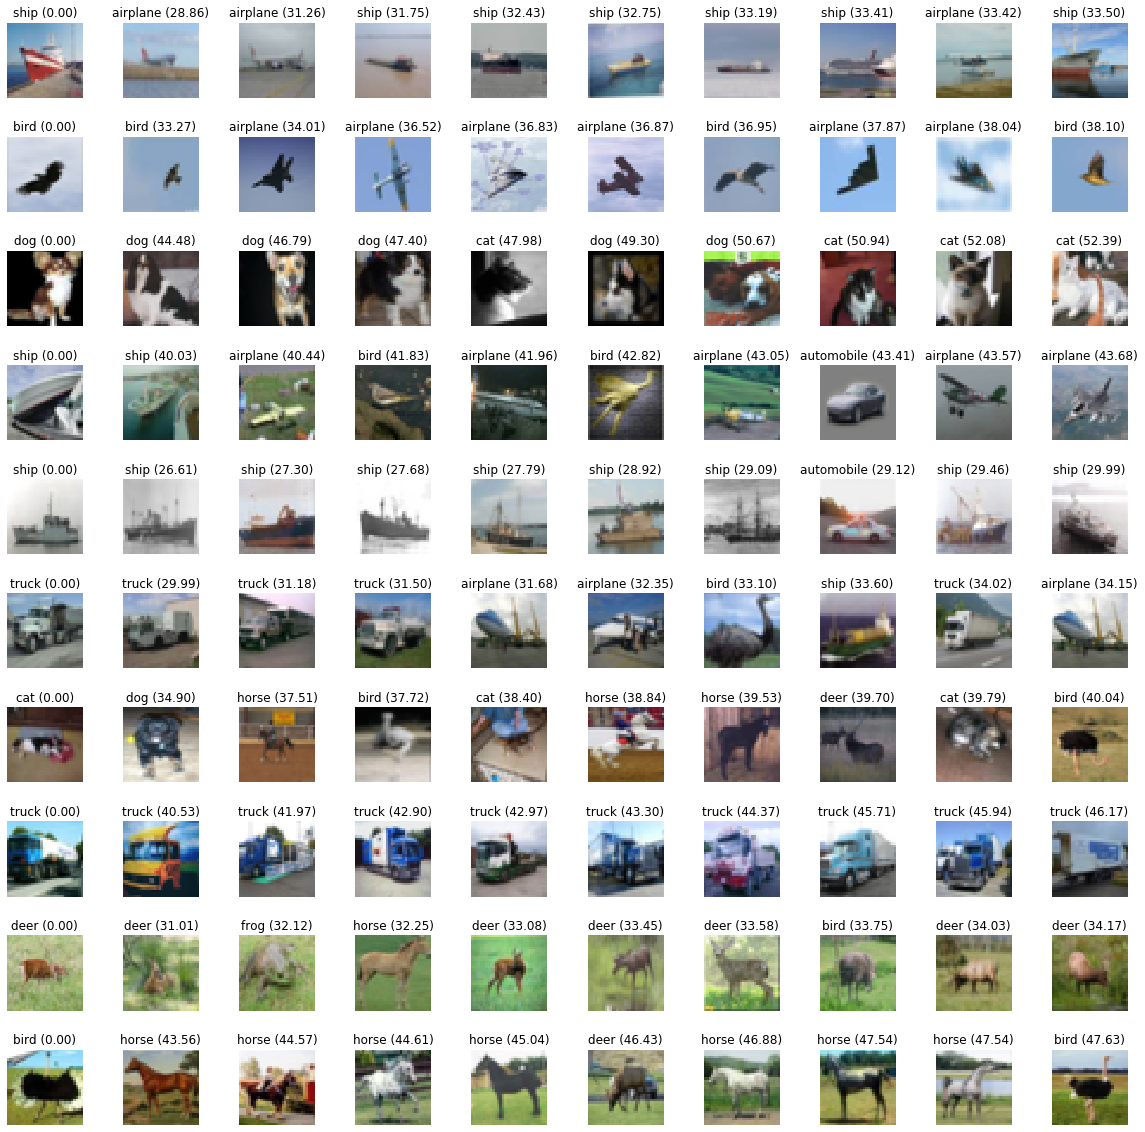

In [0]:
plt.figure(figsize=(16,16))
for i in range(10):
    closest = np.argsort(dists[i])[:10]
    for k, j in enumerate(closest):
        plt.subplot(10, 10, i*10 + k + 1)
        plt.imshow(X_test[j])
        c = class_names[y_test[j][0]]
        plt.axis('off')
        plt.title("%s (%0.2f)" % (c,dists[i][j]))
plt.tight_layout()

**<font color='purple'>Answer to (k):</font>** The results are now much accurate compare to previous task. The reason is we are extracting the feature on trained model. The trained model already identified the important feature for classification so the fetaures will be less noisy and good compare to previous task

 ## Task 2. Ensemble methods (3 points)

The goal of this homework is to get acquainted with some ensemble methods like bagging, boosting and random forests. For this we use the MNIST dataset about handwritten digits. In order to make the implementation easier we have stripped it down to only 2 digits: 2 and 3. The datasets for training and testing are in the files train.csv and test.csv. Both files have the same structure, with the first column indicating the class and all other columns are features providing the greyscale colour of pixels with values in the range 0..1.

In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.dropna()
test.dropna()

,y,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V746,V747,V748,V749,V750,V751,V752,V753,V754,V755,V756,V757,V758,V759,V760,V761,V762,V763,V764,V765,V766,V767,V768,V769,V770,V771,V772,V773,V774,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784,V785
0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2019,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train.shape, test.shape

((387, 785), (2021, 785))

In [0]:
train.head()

,y,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V746,V747,V748,V749,V750,V751,V752,V753,V754,V755,V756,V757,V758,V759,V760,V761,V762,V763,V764,V765,V766,V767,V768,V769,V770,V771,V772,V773,V774,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784,V785
0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train.y.value_counts(), test.y.value_counts()

(-1    197
  1    190
 Name: y, dtype: int64,  1    1031
 -1     990
 Name: y, dtype: int64)

We have also provided the code for plotting these images that we are trying to classify.

In [0]:
def draw_img(data, index):
    pixels = data.iloc[index][1:]
    pixels = pixels.values.reshape((28, 28))
    plt.title('Label is {label}'.format(label="3" if data.iloc[index][0] == 1 else "2"))
    plt.imshow(pixels, cmap='gray')
    plt.show()

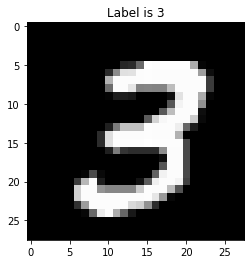

In [0]:
draw_img(train, 1)

<div class="bg-danger">In all of the following exercises use **random_state 0** when using sklearn methods.</div>
<br>
<div class="bg-danger">Use **sklearn DecisionTreeClassifier** in all of the exercises above. No need to implement this yourself.</div>

### Subtask 1: Bagging (1 point)

Bagging is a method where an ensemble of classifiers is trained on bootstrap samples of training data. To generate a bootstrap sample of a dataset with n rows one has to sample with replacement n rows from training data. The ensemble prediction is obtained by getting the predictions from each individual model and predicting the result with the most ”votes”.

- **(a)** Using sklearn.BaggingClassifier class train a bagging classifier on training data using 50 bootstrap samples (leave all other parameters at their default values). Measure and report the misclassification rate of the ensemble both on train and test data. Study the documentation and report what learning algorithm is being used to learn the individual models.

In [0]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    from sklearn import model_selection
    num_trees = 50
    seed=8
    value=1
    base_cls = DecisionTreeClassifier() 
    X=train.iloc[:,1:].values 
    Y=train['y']
    X_test=test.iloc[:,1:].values
    Y_test=test['y']
    model = BaggingClassifier(base_estimator=base_cls,n_estimators=num_trees,random_state=seed)
    train_error_rate = model_selection.cross_val_score(model, X, Y) 
    print("Error rate on train data",value-train_error_rate.mean())
    test_error_rate = model_selection.cross_val_score(model, X_test, Y_test)
    print("Error Rate on test data",value-test_error_rate.mean())
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Error rate on train data 0.08000583879944345


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Error Rate on test data 0.0460168458986806


**<font color='purple'>Misclassification rate on train data:</font>**
0.080

**<font color='purple'>Misclassification rate on test data:</font>**
0.046

**<font color='purple'>Learning algorithm for individual models:</font>**

- **(b)** Solve the same task as in Exercise 1 but implement bagging yourself, training the base classifier with DecisionTreeClassifier. Measure and report its misclassification rate on train and test data.

In [0]:
import sklearn.metrics as metrics
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    class BagDT:
    
        def __init__(self):
          BagDT.result=0
          BagDT.func=0
            # TODO

        def fit(self,X,Y):
          seed = 8
          base_class = DecisionTreeClassifier() 
          num_trees = 50
          BagDT.func= BaggingClassifier(base_estimator = base_class,n_estimators = num_trees,random_state = seed) 
          result=BagDT.func.fit(X,Y)
          
        def predict(self,X):
          result=BagDT.func.predict(X)
          return(result)
    
    model = BagDT()
    model.fit(X,Y)
    error_rate_train=model.predict(X)
    error_rate_train=metrics.accuracy_score(Y, error_rate_train)
    print("Train Missclassified Error",value -error_rate_train)
     
    model.fit(X_test,Y_test)
    error_rate_test=model.predict(X_test)
    error_rate_test=metrics.accuracy_score(Y_test, error_rate_test)
    print("Test Missclassified Error",value-error_rate_test)

    ##### YOUR CODE ENDS ##### (please do not delete this li
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Train Missclassified Error 0.0
Test Missclassified Error 0.0


**<font color='purple'>Misclassification rate on train data:</font>**

**<font color='purple'>Misclassification rate on test data:</font>**

- **(c)** Draw a figure that shows the change in misclassification rate of bagging classifier as we increase the size of the ensemble. (x-axis: number of individual models 1-50; y-axis: misclassification rate; one line for testing, one for training error rate). Discuss how the results change with the number of models in the ensemble? Discuss what would happen with the errors when the number of models is very big (e.g 5000)?

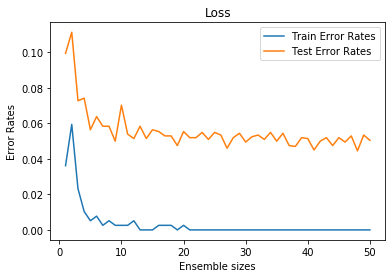

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
#    seed=1075
 #   np.random.seed(seed)
    #rf = RandomForestClassifier()
    #et = ExtraTreesClassifier()
    #knn = KNeighborsClassifier()
    #svc = SVC()
    #rg = RidgeClassifier()
    #we used 5 models  
    #clf_array = [rf, et, knn, svc, rg]
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    ensemble_sizes=np.zeros(50)
    test_error_rates=np.zeros(50)
    train_error_rates=np.zeros(50)
    for i in range(50):
      model = BaggingClassifier( n_estimators=i+1, bootstrap=True)
      model = model.fit(train.iloc[:,1:],train.iloc[:,0])
      test_pred = model.predict(test.iloc[:,1:])
      train_pred = model.predict(train.iloc[:,1:])
      train_error_rates[i]=1-accuracy_score(train.iloc[:,0], train_pred)
      test_error_rates[i] = 1-accuracy_score(test.iloc[:,0], test_pred)
      ensemble_sizes[i]=i+1


    plt.plot(ensemble_sizes,train_error_rates)
    plt.plot(ensemble_sizes,test_error_rates)
    plt.xlabel('Ensemble sizes')
    plt.ylabel('Error Rates')
    plt.legend(['Train Error Rates', 'Test Error Rates'])
    plt.title('Loss')
    plt.show()
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answers:</font>**
As the number of model changes in ensemble the error decreases gradualy, but after some models error sets to its saturation for test data set and approches nearly zero for training data set and it fluctuates within some range. so for 5000 models it will not be much different then with 50 models

### Subtask 2: Random Forest (1 point)

The ensemble can often be improved, if we decrease the correlation between the models within the ensemble. One way to do it is to use the random forest algorithm instead of bagged decision trees, and by this perform sampling on features as well, not only on instances.

- **(a)** Train a random forest classifier using sklearn.RandomForestClassifier, using 50 trees and sampling 50 features as candidates for each split decision. Measure and report its misclassification rate on train and test data.

In [0]:
X=train.iloc[:,1:].values 
Y=train['y']
value=1
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 50)]
    model = RandomForestClassifier(n_jobs=-1, n_estimators=50,max_features="auto",min_samples_leaf = 50)
    model.fit(X,Y)
    error_rate_train =model.score(X,Y)
    print("Error Misclassification On training dataset",(value-error_rate_train))
    model.fit(X_test,Y_test)
    error_rate_test = model.score(X_test,Y_test)
    print("Error Misclassification On testing dataset",(value-error_rate_test))
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Error Misclassification On training dataset 0.046511627906976716
Error Misclassification On testing dataset 0.04156358238495794


**<font color='purple'>Misclassification rate on train data:</font>**
0.0594

**<font color='purple'>Misclassification rate on test data:</font>**
0.0415

- **(b)** Implement a simpler version of the random forest type classifier, where instead of sampling features in each decision node, the features are sampled before applying the decision tree learner. That is, each individual tree is constructed on a dataset obtained by sampling $f$ features (without replacement) and bootstrap-sampling $n$ instances (with replacement), where $f$ is a parameter specified by the user (who will be yourself in the next subtask). Measure and report the misclassification rate on train and test data using 50 trees with $f=50$ and compare to the random forest from the previous exercise.

In [0]:
from sklearn import metrics
X=train.iloc[:,1:].values 
Y=train['y']
X_test=test.iloc[:,1:].values
Y_test=test['y']
value=1
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    class SimplifiedRandomForest:
      
        def __init__(self,threshold):
          self.threshold=threshold
          SimplifiedRandomForest.result=0
          SimplifiedRandomForest.func=0

       
        def fit(self,X,Y):
          SimplifiedRandomForest.func = RandomForestClassifier(n_jobs=-1, n_estimators=10,max_features="auto",min_samples_leaf = self.threshold)
          result=SimplifiedRandomForest.func.fit(X,Y)
       #   SimplifiedRandomForest.result=SimplifiedRandomForest.func.predict(X_test)  

        
        def predict(self,X):
          result=SimplifiedRandomForest.func.predict(X)
          return(result)
    
    model = SimplifiedRandomForest(10)
    model.fit(X,Y)
    error_rate_train=model.predict(X)
    error_rate_train=metrics.accuracy_score(Y, error_rate_train)
    print("Train Missclassified Error",value -error_rate_train)
     
    model.fit(X_test,Y_test)
    error_rate_test=model.predict(X_test)
    error_rate_test=metrics.accuracy_score(Y_test, error_rate_test)
    print("Test Missclassified Error",value-error_rate_test)

    ##### YOUR CODE ENDS ##### (please do not delete this line)


except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Train Missclassified Error 0.025839793281653756
Test Missclassified Error 0.022761009401286447


**<font color='purple'>Misclassification rate on train data:</font>**
0.069

**<font color='purple'>Misclassification rate on test data:</font>**
0.044

**<font color='purple'>Comparison to random forest:</font>**

- **(c)** Try values $f=10$, $f=50$ and $f=300$ and draw a similar figure as in Subtask 1 (c) for each of these three cases. What happens with the error rates if we increase the number of used features? Why?

**<font color='purple'>Answers:</font>**
Yes,If we increase the number of features the error will increase.

**F=50:**Train Missclassified Error 0.07493540051679581
Test Missclassified Error 0.05442850074220684

**F=10:** Train Missclassified Error 0.04134366925064603
Test Missclassified Error 0.020781791192478916

**F=300: bold text **
Train Missclassified Error 0.49095607235142114
Test Missclassified Error 0.07718951014349329

### Subtask 3: Boosting (1 point)

In bagging each model is built independently of all others, this is also referred to as a parallel construction. In boosting each next model is built using the information from how the previous models performed, also referred to as a sequential construction. In each iteration of boosting the training dataset is re-weighted so that the next model learned by the weak learner would concentrate efforts on the points that were misclassified earlier.

- **(a)** Train Adaboost classifier on the same dataset doing 50 steps using sklearn.AdaBoostClassifier. Measure and report its misclassification rate on train and test data.

In [0]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    model = AdaBoostClassifier(n_estimators=50,learning_rate=1)
    model.fit(X,Y)
    error_rate_train = model.score(X,Y)
    print("TrainAdaboost Classifer Error",value - error_rate_train)
    
    model.fit(X_test,Y_test)
    error_rate_test = model.score(X_test,Y_test)
    print("Test Adaboost Classifer Error",value - error_rate_test)
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

TrainAdaboost Classifer Error 0.0
Test Adaboost Classifer Error 0.005442850074220629


**<font color='purple'>Misclassification rate on train data:</font>**
0.1

**<font color='purple'>Misclassification rate on test data:</font>**
0.005

- **(b)** Implement Adaboost yourself using DecisionTreeClassifier as the base learner with $\textrm{max_depth} = 2$. The instance weights can be specified using the sample_weights parameters when fitting the decision tree. Iterate 50 steps and measure its misclassification rate on train and test data. Compare to the result of the previous subtask (3a).

In [0]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    
    class AdaBoost:
    
        def __init__(self,max_depth):
          self.max_depth=max_depth
          AdaBoost.result=0
          AdaBoost.func=0
          
        def fit(self,X,Y):
          AdaBoost.func=classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=self.max_depth),n_estimators=200)
          result=AdaBoost.func.fit(X,Y)
  

        def predict(self,X):
            AdaBoost.result=AdaBoost.func.predict(X)
            return(AdaBoost.result)
    
    maximum_depth=2
    model = AdaBoost(maximum_depth)
    model.fit(X,Y)
    error_rate_train=model.predict(X)
    error_rate_train=metrics.accuracy_score(Y, error_rate_train)
    print("Train Missclassified Error",value -error_rate_train)
   
   

    model.fit(X_test,Y_test)
    error_rate_test=model.predict(X_test)
    error_rate_test=metrics.accuracy_score(Y_test, error_rate_test)
    print("Test Missclassified Error",value -error_rate_test)
   
   
   # error_rate_test = ...
    ##### YOUR CODE ENDS ##### (please do not delete this line)

except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Train Missclassified Error 0.0
Test Missclassified Error 0.0


**<font color='purple'>Misclassification rate on train data:</font>** 0.0

**<font color='purple'>Misclassification rate on test data:</font>**
0.0

**<font color='purple'>Comparison to subtask (3a):</font>**
In 3a subtask the testing error is 0.05 something and the testing is equal to zero in part(b) whereas the training errors in both parts are same.

## Bonus Task. Neural network capacity (up to 3 bonus points)

In the lecture we have introduced a simple regression task, where the actual relationship is $y=x^2$. We generated 1000 training and 1000 test instances in the range [-1,+1] and solved the task using a multi-layer perceptron with 2 hidden layers using logistic sigmoid activation and output neuron using linear activation. This bonus exercise is about investigating the role of the network architecture, and the role of optimisation method for solving this regression task. Perform experiments, report and discuss their results. Feel free to use the code from the notebook that we provided after the practice session <LINK>. Note that you can consider reducing the training set size to make computations faster. When evaluating a particular architecture, calculate the loss on test data, but also plot the function that the regression model has learned.  Here are some questions to guide you:
* Can 1 hidden layer be enough? If yes, then how wide should that layer be (how many neurons)? 
* Does it matter what activation function is used (relu, tanh, sigmoid, linear)? 
* Does it matter what optimisation method is being used (SGD, RMSprop, Adam)? 
* In case of SGD, what learning rate values are good or bad? 
* Are the answers different if you use non-linear activation in the output neuron? 
* When using 2 hidden layers, how many neurons should these layers minimally have? 
* Is there any benefit in using more than 2 hidden layers? 
* Out of all successful network architectures that you tried, which had the minimal number of weights (the one in the lecture has 13)? 
* Which successful architecture had the fastest training time? 
* Are the results different if you use training and test data from the range [-10,+10] instead?

Note that you probably cannot answer all the combinations of all questions (number of layers, number of neurons in layers, activation function in each layer, optimisation method, learning rate, loss, speed) in full detail in reasonable time. However, in order to qualify for 2 bonus points we expect you to touch on all questions to some extent (no partial points given if touching some of the questions but not others). We expect you to provide enough explanation so that it is easy to follow your discussion of results. One (or potentially multiple) best solutions will be awarded 1 extra bonus point (thus getting 3 bonus points in total).

If you find it easier to provide the solution to the bonus task as a separate notebook, then feel free to do so. Given that you might choose to do a lot of computation, feel free to run it outside of notebooks and store the results into file(s). Your  bonus task solution notebook would then only need to read in the results and draw conclusions from them. If you have run any code outside of this current notebook then please submit everything together as a compressed file.

# Example:

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import regularizers
import matplotlib.pyplot as plt

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
  
    model = Sequential()
    model.add(Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
    model.add(Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)))
    model.add(Dense(1))

    model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
    x = np.random.random((10000,1))*100-50
    y = x**2

# fit the model, keeping 2,000 samples as validation set
    model.fit(x,y,validation_split=0.2,
             epochs=10,
             batch_size=256)

   

    ##### YOUR CODE ENDS ##### (please do not delete this line)
     
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 56us/step - loss: 1246703.2480 - val_loss: 1260051.4690
Epoch 2/10
8000/8000 [==============================] - 0s 13us/step - loss: 1246219.3430 - val_loss: 1259567.2270
Epoch 3/10
8000/8000 [==============================] - 0s 13us/step - loss: 1245731.4480 - val_loss: 1259073.8930
Epoch 4/10
8000/8000 [==============================] - 0s 12us/step - loss: 1245230.0950 - val_loss: 1258558.8190
Epoch 5/10
8000/8000 [==============================] - 0s 12us/step - loss: 1244711.7030 - val_loss: 1258034.5780
Epoch 6/10
8000/8000 [==============================] - 0s 13us/step - loss: 1244178.2020 - val_loss: 1257490.4030
Epoch 7/10
8000/8000 [==============================] - 0s 13us/step - loss: 1243636.0060 - val_loss: 1256946.6850
Epoch 8/10
8000/8000 [==============================] - 0s 12us/step - loss: 1243078.7720 - val_loss: 1256372.7790
Epoch 9/10
8000/8000 [==========

##**Q1: Can 1 hidden layer be enough? If yes, then how wide should that layer be (how many neurons)?**

Ans:The number of hidden neurons should be between the size of the input layer and the size of the output layer. The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer. The number of hidden neurons should be less than twice the size of the input layer

In [0]:
#with one hidden layer
model=Sequential()
model.add(Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)





#with more than one layer
model = Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)





Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 0s 47us/step - loss: 1216226.0940 - val_loss: 1226932.4170
Epoch 2/5
8000/8000 [==============================] - 0s 11us/step - loss: 1214097.7310 - val_loss: 1224650.7070
Epoch 3/5
8000/8000 [==============================] - 0s 13us/step - loss: 1211914.2325 - val_loss: 1222257.7940
Epoch 4/5
8000/8000 [==============================] - 0s 11us/step - loss: 1209631.4990 - val_loss: 1219831.1920
Epoch 5/5
8000/8000 [==============================] - 0s 11us/step - loss: 1207268.0400 - val_loss: 1217259.5310
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 79us/step - loss: 1239457.9780 - val_loss: 1248027.4000
Epoch 2/5
8000/8000 [==============================] - 0s 17us/step - loss: 1229126.2300 - val_loss: 1235442.6100
Epoch 3/5
8000/8000 [==============================] - 0s 18us/step - loss: 1212508.0890 - val_loss: 12125

# **# Question::Does it matter what activation function is used (relu, tanh, sigmoid, linear)?**


Ans :- Yes,it does matter which activation should we use.I performed the experiments with different actiavtion function and result of every activation is different

In [0]:
#with relu activation
model = Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)
    
#with tanh activation
model = Sequential()
model.add(Dense(8, activation='tanh', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)


#with sigmoid function

model = Sequential()
model.add(Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)


#with linear function
model = Sequential()
model.add(Dense(8, activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='linear', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)




Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 69us/step - loss: 1224255.6060 - val_loss: 1249631.9390
Epoch 2/5
8000/8000 [==============================] - 0s 13us/step - loss: 1213777.6310 - val_loss: 1239428.2270
Epoch 3/5
8000/8000 [==============================] - 0s 12us/step - loss: 1203114.2580 - val_loss: 1227541.6640
Epoch 4/5
8000/8000 [==============================] - 0s 14us/step - loss: 1190423.2180 - val_loss: 1213201.9670
Epoch 5/5
8000/8000 [==============================] - 0s 14us/step - loss: 1174889.8680 - val_loss: 1195463.1830
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 72us/step - loss: 1252768.5670 - val_loss: 1322667.7250
Epoch 2/5
8000/8000 [==============================] - 0s 16us/step - loss: 1252562.6950 - val_loss: 1322410.2850
Epoch 3/5
8000/8000 [==============================] - 0s 15us/step - loss: 1252264.4330 - val_loss: 13220

#  Question:Does it matter what optimisation method is being used (SGD, RMSprop, Adam)?


# Ans:-Yes,it does matter which optimization should we use. Like SGD in my case is not producing that much good result than RMSprop and Adam

In [0]:


#with relu activation
model = Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)
    
#with tanh activation
model = Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer='RMSprop',loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)


   
#with SGD activation
model = Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer='sgd',loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 90us/step - loss: 1241655.6940 - val_loss: 1233234.2480
Epoch 2/5
8000/8000 [==============================] - 0s 13us/step - loss: 1232292.6440 - val_loss: 1224772.8220
Epoch 3/5
8000/8000 [==============================] - 0s 13us/step - loss: 1224121.1400 - val_loss: 1216818.2565
Epoch 4/5
8000/8000 [==============================] - 0s 13us/step - loss: 1216040.6430 - val_loss: 1208037.0190
Epoch 5/5
8000/8000 [==============================] - 0s 13us/step - loss: 1206162.7060 - val_loss: 1196854.1930
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 89us/step - loss: 1227957.6820 - val_loss: 1177104.1300
Epoch 2/5
8000/8000 [==============================] - 0s 13us/step - loss: 1217636.5995 - val_loss: 1167252.1450
Epoch 3/5
8000/8000 [==============================] - 0s 13us/step - loss: 1206760.4480 - val_loss: 11561

# Question::Are the answers different if you use non-linear activation in the output neuron?

Ans: Yes,answers can be different. As our task is to produce the square of given input in thise linear actiavation with more appropriate as shown in our result




In [0]:
#with linear output activation
model = Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)


#with softmax output activation
model = Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1,activation='softmax'))
model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)



#with sigmoid output activation
model = Sequential()
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=Adam(),loss='mse')

    # generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2

# fit the model, keeping 2,000 samples as validation set
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 112us/step - loss: 1234966.3760 - val_loss: 1291116.7690
Epoch 2/5
8000/8000 [==============================] - 0s 14us/step - loss: 1217602.0890 - val_loss: 1273333.4770
Epoch 3/5
8000/8000 [==============================] - 0s 14us/step - loss: 1200095.0730 - val_loss: 1253824.8260
Epoch 4/5
8000/8000 [==============================] - 0s 13us/step - loss: 1178904.9310 - val_loss: 1229988.2430
Epoch 5/5
8000/8000 [==============================] - 0s 13us/step - loss: 1155094.7060 - val_loss: 1204893.4380
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 116us/step - loss: 1268145.4350 - val_loss: 1198508.0120
Epoch 2/5
8000/8000 [==============================] - 0s 14us/step - loss: 1268145.4470 - val_loss: 1198508.0120
Epoch 3/5
8000/8000 [==============================] - 0s 14us/step - loss: 1268145.4520 - val_loss: 119

## **Question:When using 2 hidden layers, how many neurons should these layers minimally have?**

In hour task as output should be square of input so minmum number of neuron should be 1 or 2.

## **Question:Is there any benefit in using more than 2 hidden layers?**

Increasing the number of hidden layers much more than the sufficient number of layers will cause accuracy in the test set to decrease, yes. It will cause your network to overfit to the training set, that is, it will learn the training data, but it won't be able to generalize to new unseen data

# **Question:Out of all successful network architectures that you tried, which had the minimal number of weights (the one in the lecture has 13)?**


In question, i biuild the neural network with only 2 weights. In first layer,it has 1 neuron and in second layer it also has 1 neuron

## **Question:Which successful architecture had the fastest training time?**

The one which less weights and less layers. The previous question answers has fatest training time 

## **Question:Are the results different if you use training and test data from the range [-10,+10] instead?**

In the below arctitecure they both are performing same

In [0]:
#with one hidden layer

# generate 10,000 random numbers in [-10, 10], along with their squares
x = np.random.random((10000,1))*100-10
y = x**2
model=Sequential()
model.add(Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)

# generate 10,000 random numbers in [-50, 50], along with their squares
x = np.random.random((10000,1))*100-50
y = x**2
model=Sequential()
model.add(Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (1,)))
model.add(Dense(1))
model.compile(optimizer=Adam(),loss='mse')
model.fit(x,y,validation_split=0.2,
             epochs=5,
             batch_size=256)
    

Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 121us/step - loss: 11581155.8320 - val_loss: 12039510.6000
Epoch 2/5
8000/8000 [==============================] - 0s 12us/step - loss: 11581000.0800 - val_loss: 12039348.9440
Epoch 3/5
8000/8000 [==============================] - 0s 14us/step - loss: 11580843.5680 - val_loss: 12039188.1360
Epoch 4/5
8000/8000 [==============================] - 0s 12us/step - loss: 11580687.2800 - val_loss: 12039028.6320
Epoch 5/5
8000/8000 [==============================] - 0s 12us/step - loss: 11580531.6880 - val_loss: 12038865.6960
Train on 8000 samples, validate on 2000 samples
Epoch 1/5
8000/8000 [==============================] - 1s 125us/step - loss: 1336005.1210 - val_loss: 1313088.1160
Epoch 2/5
8000/8000 [==============================] - 0s 12us/step - loss: 1332642.3565 - val_loss: 1309965.4680
Epoch 3/5
8000/8000 [==============================] - 0s 13us/step - loss: 1329414.1920 - val

  ## <font color='red'>This was the last task! Please restart and run all before submission!</font>

## How long did it take you to solve the homework?

Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay if it took 0.5 hours or 24 hours. Please count in astronomical hours (1 hour = 60 minutes) and not academic hours (1 hour = 45 minutes). The collected information will be used to improve future homeworks.

<font color = "red"><b> Replace "X" with the amount of _hours_ only. Please, **don't change the unit** "hours" or write any other text. </b></font>

**<font color='red'>Task 1 (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>Task 1 (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>Bonus Task (please change X in the next cell into your estimate)</font>**

X hours

**<font color='red'>THANK YOU FOR YOUR EFFORT!</font>**